# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams
# import seaborn as sns
# sns.set_style('darkgrid')

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ , $Y_0= 8$, $\phi=0.7$.


In [2]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates = pd.date_range('2017-01-01', '2018-03-31')
len(dates)

455

In [3]:
# store the parameters
error = np.random.normal(0,2,len(dates))
mu = 5
Y0 = 8
phi = 0.7   # Where is this coming from???

In [4]:
# generate the time series according to the formula
TS = [None] * len(dates)
y = Y0
for i, row in enumerate(dates):
    TS[i] = mu + y * phi + error[i]
    y = TS[i] - mu  # setting y to mean-centered version for next iteration

In [5]:
    ts_series = pd.Series(TS, index=dates)

Plot the time series and verify what you see

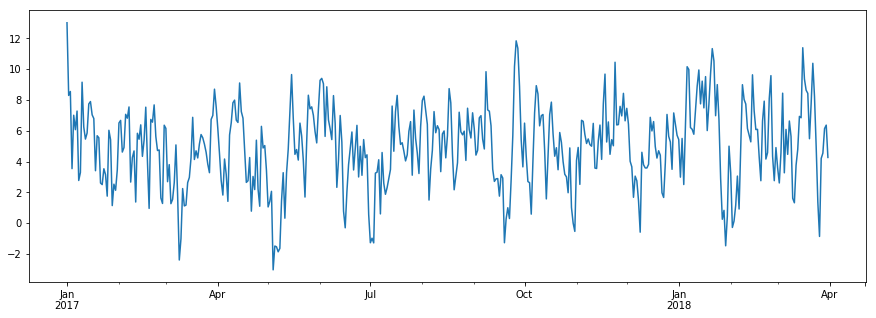

In [6]:
ts_series.plot(figsize=(15,5));

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

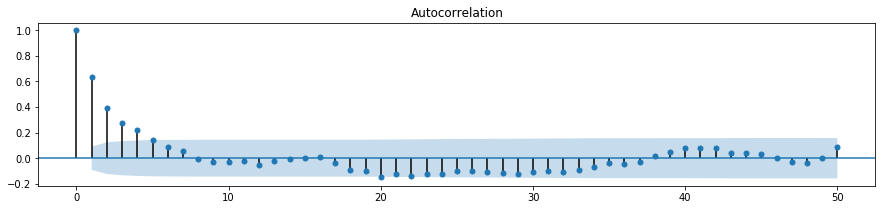

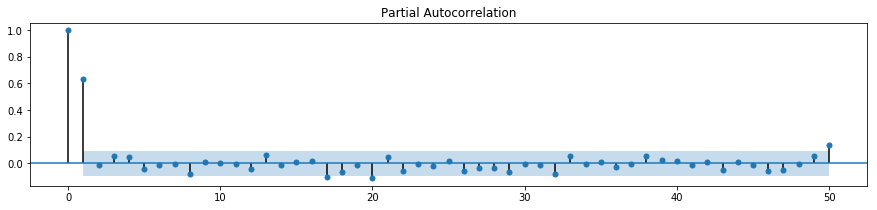

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 3
plot_acf(ts_series, lags = 50);

rcParams['figure.figsize'] = 15, 3
plot_pacf(ts_series, lags = 50);

### Analysis

ACF tails off after about 5 lags, PACF cuts off after 2 lags

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [8]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(ts_series, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Thu, 25 Jul 2019   AIC                           1943.395
Time:                        17:44:52   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.y        0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead o

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [9]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
datesMA = pd.date_range('2015-04-01', '2015-08-31')
len(datesMA)

# store the parameters
mu = 7
theta = 0.9
error = np.random.normal(0,4,len(datesMA))

#generate the time series
error_prev = error[0]
TS_MA = [None] * len(datesMA)
for i, row in enumerate(datesMA):
    TS_MA[i] = mu + error[i] + theta * error_prev 
    error_prev = error[i]

ts_MA_series = pd.Series(TS_MA, index=datesMA)

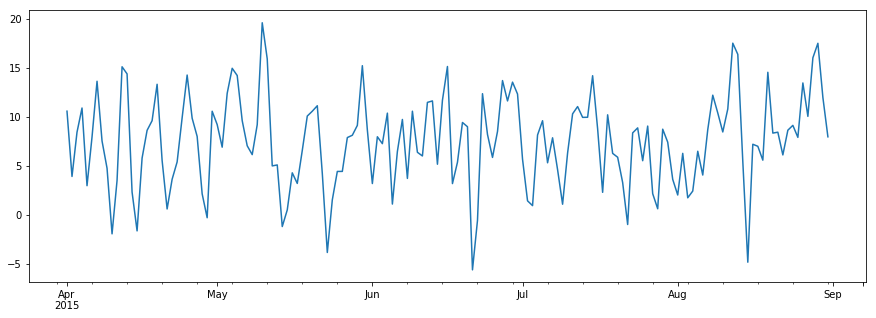

In [10]:
# Plot the time series
ts_MA_series.plot(figsize=(15,5));

## Look at the ACF and PACF of your model and write down your conclusions

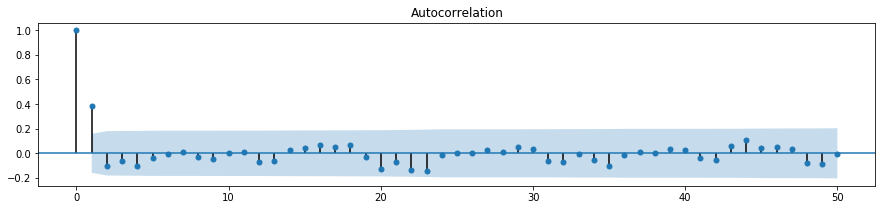

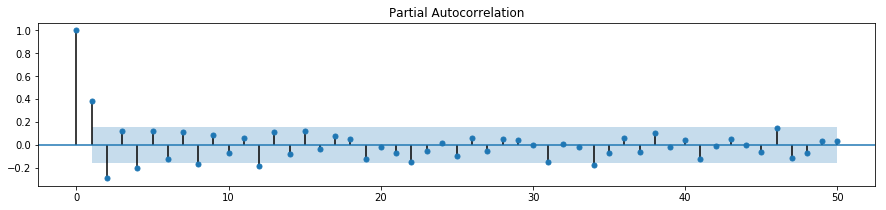

In [11]:
rcParams['figure.figsize'] = 15, 3
plot_acf(ts_MA_series, lags = 50);

rcParams['figure.figsize'] = 15, 3
plot_pacf(ts_MA_series, lags = 50);

### Observations

Both ACF & PACF cut off abruptly after 2 lags

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [12]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts_MA_series, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -426.378
Method:                       css-mle   S.D. of innovations              3.909
Date:                Thu, 25 Jul 2019   AIC                            858.757
Time:                        17:44:52   BIC                            867.848
Sample:                    04-01-2015   HQIC                           862.450
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5373      0.590     12.776      0.000       6.381       8.694
ma.L1.y        0.8727      0.051     17.165      0.000       0.773       0.972
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [26]:
# the data is in "winning_400m.csv"
df = pd.read_csv('winning_400m.csv')

In [27]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)

Plot the data

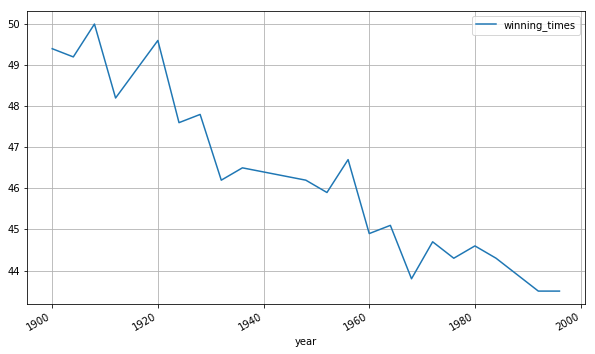

In [35]:
df.plot(grid=True, figsize=(10,6));

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [39]:
df_diff = df.diff(periods=1).dropna()

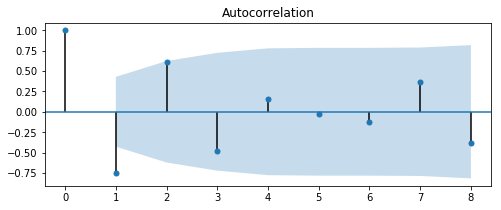

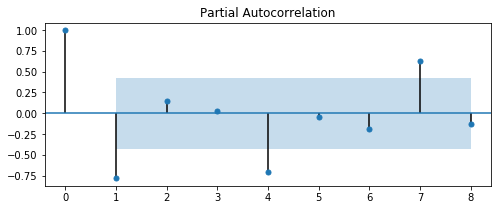

In [43]:
rcParams['figure.figsize'] = 8, 3
plot_acf(df_diff, lags = 8);

rcParams['figure.figsize'] = 8, 3
plot_pacf(df_diff, lags = 8);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [47]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(df_diff, order=(1,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Thu, 25 Jul 2019   AIC                             47.916
Time:                        17:56:15   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.004      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_ti

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [48]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(df_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Thu, 25 Jul 2019   AIC                             44.943
Time:                        17:56:15   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.069      0.000      -1.948      -1.567
ar.L2.winning_ti

## What is your final model? Why did you pick this model?

My model is ARMA(2,2) because the AIC & BIC scores were better than ARMA(1,1) and so were the p-values of the coefficients.

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.